In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import json

In [3]:
#import and read json file
recipies = pd.read_json('recipies.json')
recipies.head()

,id,cuisine,ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,22213,indian,"[water, vegetable oil, wheat, salt]"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe..."


In [4]:
len(recipies)

39774

In [5]:
# Check for any missing data
print("Table size -", end=' ')
print(recipies.shape)

print("Checking for missing values..")
# Number of missing values in each column of training data
missing_val_count_by_column = (recipies.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

# Get names of columns with missing values
missing_cols = [col for col in recipies.columns
                     if recipies[col].isnull().any()]

Table size - (39774, 3)
Checking for missing values..
Series([], dtype: int64)


In [7]:
#great, no missing values. what can I do with ingredients? list?
type(recipies.loc[0,'ingredients'])

list

In [8]:
#define a column for number of ingredients in the dish
recipies['num_ingredients'] = recipies.apply(lambda x: len(x['ingredients']), axis=1)
recipies.head()

,id,cuisine,ingredients,num_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20


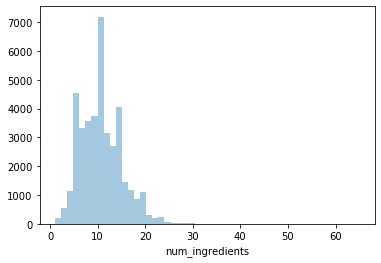

In [9]:
sns.distplot(recipies['num_ingredients'], kde=False)

In [10]:
recipies['num_ingredients'].max()

65

In [11]:
#at least 1 outlier recipie with 65 ingredients, actually 40 such recipies
len(recipies[recipies['num_ingredients']>30])

40

In [12]:
# a lot of the recipies with high number of ingredients are mexican and indian
recipies.loc[recipies['num_ingredients']>30, 'cuisine'].value_counts()

mexican         12
indian           5
italian          3
thai             3
jamaican         2
chinese          2
southern_us      2
moroccan         2
brazilian        2
cajun_creole     2
filipino         1
vietnamese       1
french           1
spanish          1
japanese         1
Name: cuisine, dtype: int64

In [40]:
# 20 different cuisines here, nothing grossly underrepresented
recipies['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [44]:
#base probabilities
a = (recipies['cuisine'].value_counts())/len(recipies)
a

italian         0.197063
mexican         0.161865
southern_us     0.108614
indian          0.075502
chinese         0.067205
french          0.066526
cajun_creole    0.038870
thai            0.038694
japanese        0.035777
greek           0.029542
spanish         0.024865
korean          0.020868
vietnamese      0.020742
moroccan        0.020642
british         0.020214
filipino        0.018982
irish           0.016770
jamaican        0.013225
russian         0.012294
brazilian       0.011741
Name: cuisine, dtype: float64

In [47]:
# groupby num_ingredients to see any differences here
recipies.groupby('cuisine')['num_ingredients'].mean().sort_values(ascending=False)

cuisine
moroccan        12.909866
indian          12.705961
vietnamese      12.675152
cajun_creole    12.617076
thai            12.545809
jamaican        12.214829
chinese         11.982791
korean          11.284337
mexican         10.877446
spanish         10.423660
russian         10.224949
greek           10.182128
filipino        10.000000
italian          9.909033
french           9.817838
japanese         9.735067
british          9.708955
southern_us      9.634954
brazilian        9.520343
irish            9.299850
Name: num_ingredients, dtype: float64

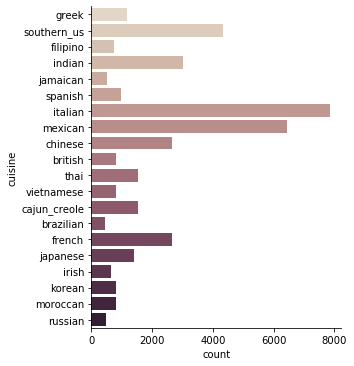

In [15]:
sns.catplot(y="cuisine", kind="count", palette="ch:.25", data=recipies);

In [28]:
recipies['ingredients'][0]

['romaine lettuce',
 'black olives',
 'grape tomatoes',
 'garlic',
 'pepper',
 'purple onion',
 'seasoning',
 'garbanzo beans',
 'feta cheese crumbles']

In [16]:
# get a master list of all ingredients
all_ingredients = []
for i in range(len(recipies)):
    all_ingredients += recipies.loc[i,'ingredients']

In [17]:
#428275 total ingredients
len(all_ingredients)

428275

In [18]:
# get unique ingredients and frequency of each
from collections import Counter
freq_ingredients = Counter(all_ingredients)
freq_ingredients=dict(freq_ingredients)

In [19]:
freq_ingredients = pd.DataFrame.from_dict(freq_ingredients.items())
freq_ingredients.columns = ['ingredient','frequency']

In [20]:
# salt most frequent! surprise!
freq_ingredients.sort_values(by=['frequency'], ascending=False)

,ingredient,frequency
11,salt,18049
54,olive oil,7972
35,onions,7972
29,water,7457
3,garlic,7380
...,...,...
5035,sauerkraut juice,1
5034,no-calorie sweetener,1
5033,Bob Evans Italian Sausage,1
5022,extra firm silken tofu,1


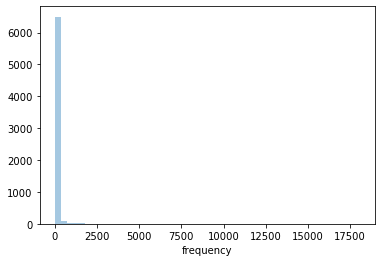

In [21]:
# very bottom heavy distribution
sns.distplot(freq_ingredients['frequency'], kde=False)

In [22]:
freq_ingredients

,ingredient,frequency
0,romaine lettuce,270
1,black olives,229
2,grape tomatoes,228
3,garlic,7380
4,pepper,4438
...,...,...
6709,LiptonÂ® Iced Tea Brew Family Size Tea Bags,1
6710,Hidden ValleyÂ® Greek Yogurt Original RanchÂ® ...,1
6711,lop chong,1
6712,tomato garlic pasta sauce,1


In [32]:
def stringify(x):
    x=str(x)[1:-1]
    x=x.replace('\'','')
    return x

In [33]:
#define a column for ingredients as string
recipies['str_ingredients'] = recipies.apply(lambda x: stringify(x['ingredients']), axis=1)
recipies.head()

,id,cuisine,ingredients,num_ingredients,str_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9,"romaine lettuce, black olives, grape tomatoes,..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11,"plain flour, ground pepper, salt, tomatoes, gr..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,22213,indian,"[water, vegetable oil, wheat, salt]",4,"water, vegetable oil, wheat, salt"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20,"black pepper, shallots, cornflour, cayenne pep..."


In [34]:
test = recipies.head(5)

In [35]:
test

,id,cuisine,ingredients,num_ingredients,str_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9,"romaine lettuce, black olives, grape tomatoes,..."
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11,"plain flour, ground pepper, salt, tomatoes, gr..."
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,"eggs, pepper, salt, mayonaise, cooking oil, gr..."
3,22213,indian,"[water, vegetable oil, wheat, salt]",4,"water, vegetable oil, wheat, salt"
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20,"black pepper, shallots, cornflour, cayenne pep..."


In [37]:
# Testing TFIDF vectorizer for use later in model training
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(analyzer=lambda d: d.split(', '))
vectors = vectorizer.fit_transform(test['str_ingredients'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
testdf = pd.DataFrame(denselist, columns=feature_names)

In [38]:
# Great, it works, save the updated recipies w/num_ingredients and str_ingredients
testdf.head()

,bay leaf,black olives,black pepper,boneless chicken skinless thigh,butter,cayenne pepper,chicken livers,chili powder,cooking oil,cornflour,...,seasoning,shallots,soy sauce,thyme,tomatoes,vegetable oil,water,wheat,yellow corn meal,yellow onion
0,0.000000,0.339992,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.339992,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.32844,0.32844,0.264984,0.000000,0.000000,0.32844,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.251753,0.000000,0.312041,0.000000,0.312041,0.000000,...,0.000000,0.000000,0.312041,0.00000,0.00000,0.000000,0.000000,0.000000,0.00000,0.312041
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.00000,0.498512,0.498512,0.617893,0.00000,0.000000
4,0.233953,0.000000,0.233953,0.233953,0.188752,0.233953,0.000000,0.233953,0.000000,0.233953,...,0.000000,0.233953,0.000000,0.00000,0.00000,0.000000,0.188752,0.000000,0.00000,0.000000


In [39]:
export = recipies.to_csv('./data/recipies_features_plain.csv', header=True, index = False)

In [88]:
recipies.head()

,id,cuisine,ingredients,num_ingredients
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12
3,22213,indian,"[water, vegetable oil, wheat, salt]",4
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20


In [81]:
freq_ingredients.loc[0,'ingredient']

'romaine lettuce'

In [92]:
export = recipies.to_csv('./data/recipies_features_1.csv', header=True, index = False)

In [93]:
export = freq_ingredients.to_csv('./data/ingredient_list.csv', header=True, index = False)

In [90]:
recipies.head()

,id,cuisine,ingredients,num_ingredients,ingredient_0,ingredient_1,ingredient_2,ingredient_3,ingredient_4,ingredient_5,...,ingredient_3688,ingredient_3689,ingredient_3690,ingredient_3691,ingredient_3692,ingredient_3693,ingredient_3694,ingredient_3695,ingredient_3696,ingredient_3697
0,10259,greek,"[romaine lettuce, black olives, grape tomatoes...",9,True,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
1,25693,southern_us,"[plain flour, ground pepper, salt, tomatoes, g...",11,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,20130,filipino,"[eggs, pepper, salt, mayonaise, cooking oil, g...",12,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,22213,indian,"[water, vegetable oil, wheat, salt]",4,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,13162,indian,"[black pepper, shallots, cornflour, cayenne pe...",20,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [26]:
export = recipies.to_csv('./data/recipies_features_plain.csv', header=True, index = False)